# ESTUDIO CARACTERÍSTICAS  PRINCIPALES RECURSO FOTOVOLTAICO MEGAPARK SS REYES


En el seno de un proyecto de instalación de un sistema fotovoltaico de marquesinas solares y fotolinera se estudia las características del recurso fotovoltaico

In [2]:
import numpy as np
from pvlib import location
from pvlib import irradiance
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def get_data_location(caracteristics,caracteristics_module,date):
    site = location.Location(caracteristics['lat'], 
                             caracteristics['lon'],
                            caracteristics['tz'])                                                      
    times = pd.date_range(date, freq='60min', periods=24,
                      tz=site.tz)
    clearsky = site.get_clearsky(times)
    solar_position = site.get_solarposition(times)
    
    total_irrad=irradiance.get_total_irradiance( 
    surface_tilt=caracteristics_module['tilt'],
    surface_azimuth=caracteristics_module['surface_azimuth'],
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])
    
    AOI_=irradiance.aoi( caracteristics_module['tilt'],
                   caracteristics_module['surface_azimuth'],
                   solar_position['apparent_zenith'], 
                   solar_position['azimuth'])
    
    AOI= AOI_ 
    for i in range(len(AOI_)):
        if AOI_[i]>90:
            AOI[i]=90
        else:
            AOI[i]=AOI_[i]
    
    AOI.index = AOI.index.strftime("%H:%M")
    total_irrad.index = total_irrad.index.strftime("%H:%M")
    return pd.DataFrame({'AOI': AOI,
                         'POA_direct': total_irrad['poa_direct'],
                         'POA_diffuse': total_irrad['poa_diffuse'],
                         'POA_tot':total_irrad['poa_global'],
                         'times':times})

In [15]:
caracteristics_place={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-01-21',
    }

In [16]:
caracteristics_module={    
    'tilt':0,
    'surface_azimuth':180,
    }

# IRRADIANCIA 1 DÍA

In [17]:
data_location=get_data_location(caracteristics_place,caracteristics_module,caracteristics_place['date']) 

In [18]:
Irradiance=data_location['POA_tot']
aoi=data_location['AOI']

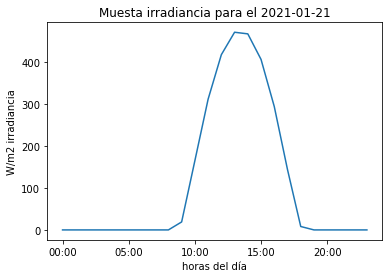

In [19]:
Irradiance.plot()
plt.xlabel('horas del día')
plt.ylabel('W/m2 irradiancia')
plt.title("Muesta irradiancia para el "+ caracteristics_place['date'])

plt.show()

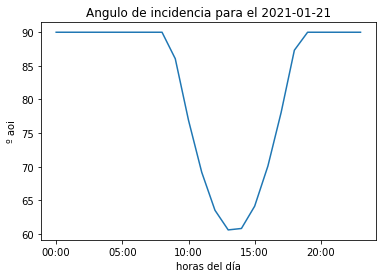

In [20]:
aoi.plot()
plt.xlabel('horas del día')
plt.ylabel('º aoi')
plt.title("Angulo de incidencia para el "+ caracteristics_place['date'])

plt.show()

# IRRADIANCIA MÁXIMA A LO LARGO DEL AÑO

In [21]:
date=np.array('2021-01-01', dtype=np.datetime64)
date= date + np.arange(365)

In [39]:
aoi_=[]
irradiance_=[]
Index=[]
hsp=[]
for day in date:
    data_location=get_data_location(caracteristics_place,caracteristics_module,day) 
    hsp.append(data_location['POA_tot'].sum()/1000)
    for i in range(len(data_location['AOI'])):
        aoi_.append(data_location['AOI'][i])
        irradiance_.append(data_location['POA_tot'][i])
        Index.append(data_location['times'][i])
    
aoi=pd.Series(aoi_)
Irradiance=pd.Series(irradiance_)
aoi.index=Index
Irradiance.index=Index

Estudio horas sol pico cada mes

In [49]:
enero=[]
febrero=[]
marzo=[]
abril=[]
mayo=[]
junio=[]
julio=[]
agosto=[]
septiembre=[]
octubre=[]
noviembre=[]
diciembre=[]
for i in range(len(hsp)):
    if i<31:
        enero.append(hsp[i])
    elif i<59:
        febrero.append(hsp[i])    
    elif i<90:
        marzo.append(hsp[i])
    elif i<120:
        abril.append(hsp[i])
    elif i<151:
        mayo.append(hsp[i])
    elif i<181:
        junio.append(hsp[i])
    elif i<212:
        julio.append(hsp[i])
    elif i<243:
        agosto.append(hsp[i])
    elif i<273:
        septiembre.append(hsp[i])
    elif i<304:
        octubre.append(hsp[i])
    elif i<334:
        noviembre.append(hsp[i])
    else:
        diciembre.append(hsp[i])

print("Media HSP en enero: "+ str(sum(enero)/31))
print("Media HSP en febrero: "+ str(sum(febrero)/28))
print("Media HSP en marzo: "+ str(sum(marzo)/31))
print("Media HSP en abril: "+ str(sum(abril)/30))
print("Media HSP en mayo: "+ str(sum(mayo)/31))
print("Media HSP en junio: "+ str(sum(junio)/30))
print("Media HSP en julio: "+ str(sum(julio)/31))
print("Media HSP en agosto: "+ str(sum(agosto)/31))
print("Media HSP en septiembre: "+ str(sum(septiembre)/30))
print("Media HSP en octubre: "+ str(sum(octubre)/31))
print("Media HSP en noviembre: "+ str(sum(noviembre)/30))
print("Media HSP en diciembre: "+ str(sum(diciembre)/31))


Media HSP en enero: 2.60497691787443
Media HSP en febrero: 3.735014270872199
Media HSP en marzo: 5.3583878556329045
Media HSP en abril: 6.7815440711605115
Media HSP en mayo: 7.723063834193712
Media HSP en junio: 7.982594065328625
Media HSP en julio: 7.727752077969787
Media HSP en agosto: 6.769634906070895
Media HSP en septiembre: 5.488851657130507
Media HSP en octubre: 4.00080687949773
Media HSP en noviembre: 2.7631785124331567
Media HSP en diciembre: 2.2598041275778256


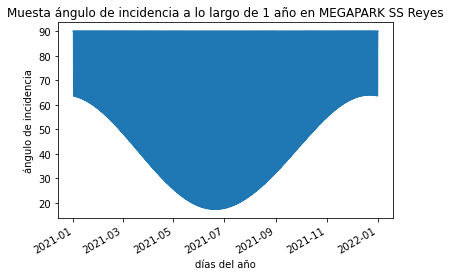

In [23]:
aoi.plot()
plt.xlabel('días del año')
plt.ylabel('ángulo de incidencia')
plt.title("Muesta ángulo de incidencia a lo largo de 1 año en MEGAPARK SS Reyes")
plt.show()

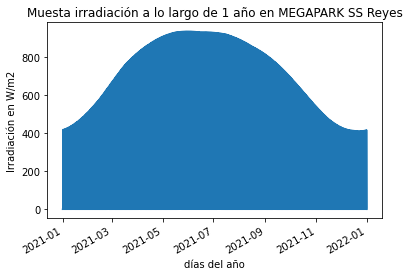

In [24]:
Irradiance.plot()
plt.xlabel('días del año')
plt.ylabel('Irradiación en W/m2')
plt.title("Muesta irradiación a lo largo de 1 año en MEGAPARK SS Reyes")
plt.show()